<a href="https://colab.research.google.com/github/ashwinmano/Data-Analysis/blob/master/1840103_M_Ashwin_MidSem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('/content/ASHWIN M 1840103 - csc541acia2.csv')
df


,ID1,ID2,ID3,ID4,ID5,ID6,ID7,ID8,Target
0,1,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39
1,2,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46
2,3,Uptown,3.8,-24.0,8.9,11.8,22.2,35787,20
3,4,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17
4,5,North Center,0.3,7.5,5.2,4.5,26.2,57123,6
...,...,...,...,...,...,...,...,...,...
72,73,Washington Height,1.1,16.9,20.8,13.7,42.6,19713,48
73,74,Mount Greenwood,1.0,3.4,8.7,4.3,36.8,34381,16
74,75,Morgan Park,0.8,13.2,15.0,10.8,40.3,27149,30
75,76,O'Hare,3.6,15.4,7.1,10.9,30.3,25828,24


In [ ]:
df.head(5)

,ID1,ID2,ID3,ID4,ID5,ID6,ID7,ID8,Target
0,1,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39
1,2,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46
2,3,Uptown,3.8,-24.0,8.9,11.8,22.2,35787,20
3,4,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17
4,5,North Center,0.3,7.5,5.2,4.5,26.2,57123,6


**DESCRIBE THE DATA**


In [ ]:
#Task 1
df['Target'].describe() 

count    77.000000
mean     49.506494
std      28.690556
min       1.000000
25%      25.000000
50%      50.000000
75%      74.000000
max      98.000000
Name: Target, dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID1     77 non-null     int64  
 1   ID2     77 non-null     object 
 2   ID3     77 non-null     float64
 3   ID4     77 non-null     float64
 4   ID5     77 non-null     float64
 5   ID6     77 non-null     float64
 6   ID7     77 non-null     float64
 7   ID8     77 non-null     int64  
 8   Target  77 non-null     int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 5.5+ KB


In [ ]:
df.shape

(77, 9)

**Data Visualization**

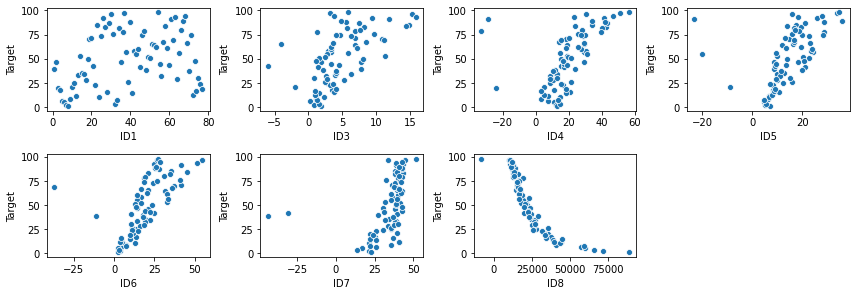

In [ ]:
#Task 2 Scatter Plot
import seaborn as sns
num_attributes=df.select_dtypes(exclude='object').drop('Target',axis=1).copy()
f = plt.figure(figsize=(12,18))

for i in range(len(num_attributes.columns)):
    f.add_subplot(9, 4, i+1)
    sns.scatterplot(num_attributes.iloc[:,i].dropna(),df['Target'])
    plt.xlabel(num_attributes.columns[i])
    
plt.tight_layout()
plt.show()

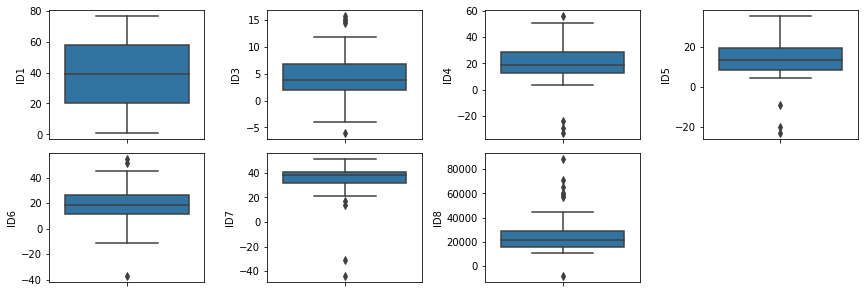

In [ ]:
#Box Plot
fig = plt.figure(figsize=(12, 18))

for i in range(len(num_attributes.columns)):
    fig.add_subplot(9, 4, i+1)
    sns.boxplot(y=num_attributes.iloc[:,i])

plt.tight_layout()
plt.show()

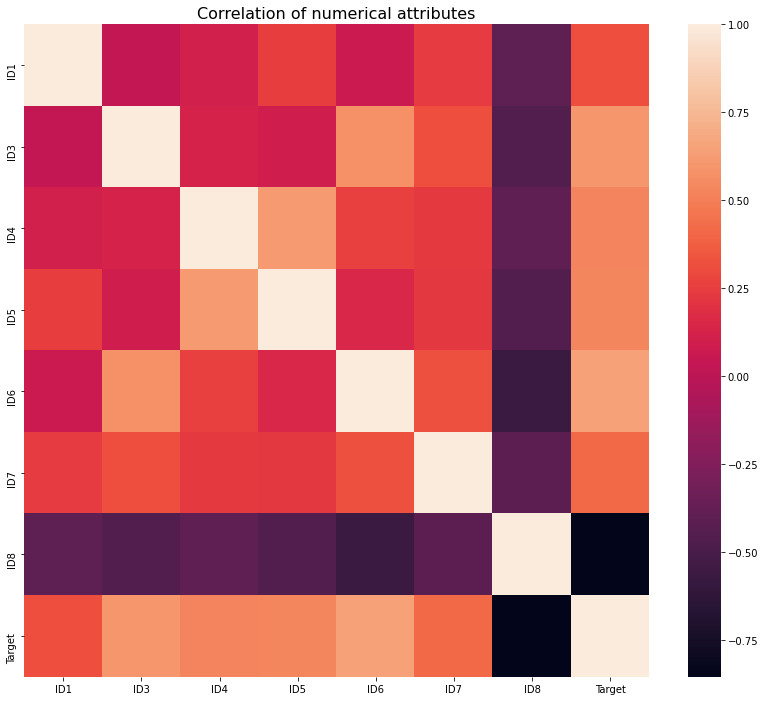

In [ ]:
correlation = df.corr()

f, ax = plt.subplots(figsize=(14,12))
plt.title('Correlation of numerical attributes', size=16)
sns.heatmap(correlation)
plt.show()

 **Preprocess**

In [ ]:
#Preprocess of Data
#Using interquartile range method

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)


ID1          38.0
ID3           4.9
ID4          15.7
ID5          10.9
ID6          15.1
ID7           8.9
ID8       13133.0
Target       49.0
dtype: float64


In [ ]:
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_out.shape

(58, 9)

In [ ]:
df_out

,ID1,ID2,ID3,ID4,ID5,ID6,ID7,ID8,Target
0,1,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39
1,2,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46
3,4,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17
8,9,Edison Park,1.1,3.3,6.5,7.4,35.3,40959,8
10,11,Jefferson Park,2.7,8.6,12.4,13.4,35.5,27751,25
11,12,Forest Glen,1.1,7.5,6.8,4.9,40.5,44164,11
12,13,North Park,3.9,13.2,9.9,14.4,39.0,26576,33
13,14,Albany Park,11.3,19.2,10.0,32.9,32.0,21323,53
14,15,Portage Park,4.1,11.6,12.6,19.3,34.0,24336,35
15,16,Irving Park,6.3,13.1,10.0,22.4,31.6,27249,34


**Splitting Of Data and Regression** 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
x = df_out[['ID3', 'ID4', 'ID5' ,'ID6', 'ID7', 'ID8']].values.reshape(-1,6)
y = df_out['Target'].values.reshape(-1,1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=100)


In [ ]:
print('train data:',X_train.shape)
print('test data:', X_test.shape)

train data: (52, 6)
test data: (6, 6)


In [ ]:
regressor = LinearRegression()
regressor.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
r_sq = regressor.score(x, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.9892111049405159


In [ ]:
print(regressor.intercept_)
print(regressor.coef_)

[-7.54600185]
[[ 4.35600773e-01  7.77819578e-01  6.65923025e-01  8.26191985e-01
   6.89387985e-01 -5.92993589e-04]]


In [ ]:
y_pred = regressor.predict(x)
de = pd.DataFrame({'Actual': y.flatten(), 'Predicted': y_pred.flatten()})
de

,Actual,Predicted
0,39,39.757387
1,46,45.153962
2,17,14.272718
3,8,5.989255
4,25,27.664895
5,11,9.074668
6,33,34.036596
7,53,55.567383
8,35,36.606903
9,34,36.179828


In [ ]:
import plotly.express as px
fig = px.scatter(de, x="Actual", y="Predicted", color='Predicted', marginal_y="box",
 marginal_x="box", trendline="ols", template="simple_white")
fig.show()

**Mean Squared Error**

In [ ]:
print('MSE:', metrics.mean_squared_error(y, y_pred))

MSE: 6.760176039089722
